In [ ]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Genre"] = le.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

X=df.iloc[:,1:5]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

model = KMeans(n_clusters=5,random_state=42)

params={'n_clusters':[2,3,4,5]}

grid_cv = GridSearchCV(model,params,cv=5)
grid_cv.fit(X)

best_n_clusters = grid_cv.best_params_['n_clusters']
print(f"Optimal number of clusters: {best_n_clusters}")

Optimal number of clusters: 5


In [ ]:
model = KMeans(n_clusters=best_n_clusters,random_state=42)

model.fit(X)
labels = model.labels_
centroid = model.cluster_centers_

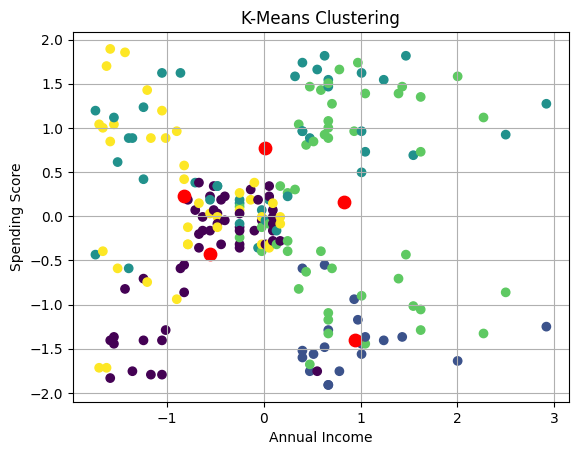

In [ ]:
plt.scatter(X[:,2],X[:,3],c=labels)
plt.scatter(centroid[:,2],centroid[:,3],s=80,color='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.grid()
plt.show()